In [1]:
from icecream import ic
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from miscellaneous.loader import load_image
from miscellaneous.propagator import angular_spectrum_band_limited
from miscellaneous.tie import FFTSolver2D

In [2]:
file = '../../generation/image/TIE_Multiple.tif'
phase = load_image(file) + 0.2

In [3]:
i_amplitude = 0.5
intensity = i_amplitude * np.ones(phase.shape)

mean = 0.0
standard_deviation = 0.001
noise = np.random.normal(mean, standard_deviation, size=intensity.shape)
intensity += noise
complex_field_back_propagation = np.sqrt(intensity) * np.exp(1j * phase)

noise = np.random.normal(mean, standard_deviation, size=intensity.shape)
intensity += noise
complex_field_forward_propagation = np.sqrt(intensity) * np.exp(1j * phase)

In [4]:
start=0.000010  # 10 mkm
stop=0.002500  # 2500 mkm
step=0.000010  # 10 mkm

px_size = 0.000005  # 5 mkm
wavelength = 0.000000555  # 555 nm

distances = np.arange(start, stop + step, step)
forward_propagated_fields = []
for distance in distances:
    ic(distance)
    complex_field = np.copy(complex_field_forward_propagation)
    forward_propagated_fields.append(angular_spectrum_band_limited(complex_field, distance, wavelength, px_size))

ic| distance: 1e-05
ic| distance: 2e-05
ic| distance: 3.0000000000000004e-05
ic| distance: 4e-05
ic| distance: 5e-05
ic| distance: 6e-05
ic| distance: 7.000000000000001e-05
ic| distance: 8e-05
ic| distance: 9e-05
ic| distance: 0.0001
ic| distance: 0.00011
ic| distance: 0.00012
ic| distance: 0.00013000000000000002
ic| distance: 0.00014000000000000001
ic| distance: 0.00015000000000000001
ic| distance: 0.00016
ic| distance: 0.00017
ic| distance: 0.00018
ic| distance: 0.00019
ic| distance: 0.0002
ic| distance: 0.00021
ic| distance: 0.00022
ic| distance: 0.00023
ic| distance: 0.00024
ic| distance: 0.00025000000000000006
ic| distance: 0.00026000000000000003
ic| distance: 0.00027000000000000006
ic| distance: 0.00028000000000000003
ic| distance: 0.00029000000000000006
ic| distance: 0.00030000000000000003
ic| distance: 0.00031000000000000005
ic| distance: 0.00032
ic| distance: 0.00033000000000000005
ic| distance: 0.0003400000000000001
ic| distance: 0.00035000000000000005
ic| distance: 0.0003600

In [5]:
start=-0.000010  # -10 mkm
stop=-0.002500  # -2500 mkm
step=-0.000010  # -10 mkm

distances = np.arange(start, stop + step, step)
back_propagated_fields = []
for distance in distances:
    ic(distance)
    complex_field = np.copy(complex_field_back_propagation)
    back_propagated_fields.append(angular_spectrum_band_limited(complex_field, distance, wavelength, px_size))

ic| distance: -1e-05
ic| distance: -2e-05
ic| distance: -3.0000000000000004e-05
ic| distance: -4e-05
ic| distance: -5e-05
ic| distance: -6e-05
ic| distance: -7.000000000000001e-05
ic| distance: -8e-05
ic| distance: -9e-05
ic| distance: -0.0001
ic| distance: -0.00011
ic| distance: -0.00012
ic| distance: -0.00013000000000000002
ic| distance: -0.00014000000000000001
ic| distance: -0.00015000000000000001
ic| distance: -0.00016
ic| distance: -0.00017
ic| distance: -0.00018
ic| distance: -0.00019
ic| distance: -0.0002
ic| distance: -0.00021
ic| distance: -0.00022
ic| distance: -0.00023
ic| distance: -0.00024
ic| distance: -0.00025000000000000006
ic| distance: -0.00026000000000000003
ic| distance: -0.00027000000000000006
ic| distance: -0.00028000000000000003
ic| distance: -0.00029000000000000006
ic| distance: -0.00030000000000000003
ic| distance: -0.00031000000000000005
ic| distance: -0.00032
ic| distance: -0.00033000000000000005
ic| distance: -0.0003400000000000001
ic| distance: -0.000350000

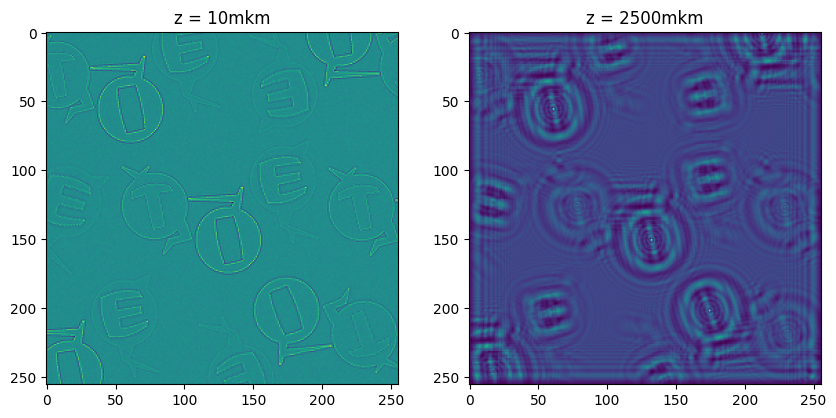

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8), dpi=100)

ax1.imshow(np.abs(forward_propagated_fields[0])**2)
ax1.set_title('z = 10mkm')
ax2.imshow(np.abs(forward_propagated_fields[-1])**2)
ax2.set_title('z = 2500mkm')

plt.show()

In [7]:
start=0.000010  # 10 mkm
stop=0.002500  # 1000 mkm
step=0.000010  # 10 mkm

distances = np.arange(start, stop + step, step)
retrieved_phases = {}
for dz, i in zip(distances, range(len(distances))):
    ic(dz)
    intensities = [np.abs(field) ** 2 for field in [forward_propagated_fields[i], back_propagated_fields[i]]]

    dz = 2 * dz
    dz = - dz
    threshold = 0.1

    solver = FFTSolver2D(intensities, dz, wavelength, px_size)
    retrieved_phases[-dz] = solver.solve(threshold)

ic| dz: 1e-05
ic| dz: 2e-05
ic| dz: 3.0000000000000004e-05
ic| dz: 4e-05
ic| dz: 5e-05
ic| dz: 6e-05
ic| dz: 7.000000000000001e-05
ic| dz: 8e-05
ic| dz: 9e-05
ic| dz: 0.0001
ic| dz: 0.00011
ic| dz: 0.00012
ic| dz: 0.00013000000000000002
ic| dz: 0.00014000000000000001
ic| dz: 0.00015000000000000001
ic| dz: 0.00016
ic| dz: 0.00017
ic| dz: 0.00018
ic| dz: 0.00019
ic| dz: 0.0002
ic| dz: 0.00021
ic| dz: 0.00022
ic| dz: 0.00023
ic| dz: 0.00024
ic| dz: 0.00025000000000000006
ic| dz: 0.00026000000000000003
ic| dz: 0.00027000000000000006
ic| dz: 0.00028000000000000003
ic| dz: 0.00029000000000000006
ic| dz: 0.00030000000000000003
ic| dz: 0.00031000000000000005
ic| dz: 0.00032
ic| dz: 0.00033000000000000005
ic| dz: 0.0003400000000000001
ic| dz: 0.00035000000000000005
ic| dz: 0.0003600000000000001
ic| dz: 0.00037000000000000005
ic| dz: 0.0003800000000000001
ic| dz: 0.00039000000000000005
ic| dz: 0.0004000000000000001
ic| dz: 0.00041000000000000005
ic| dz: 0.00042000000000000007
ic| dz: 0.000430000

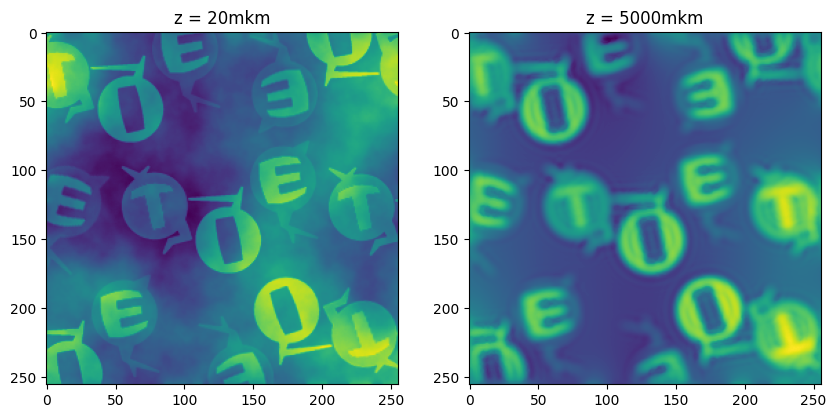

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8), dpi=100)

ax1.imshow(retrieved_phases[0.00002])
ax1.set_title('z = 20mkm')
ax2.imshow(retrieved_phases[0.005])
ax2.set_title('z = 5000mkm')

plt.show()

ic| dz: 2e-05, powers[dz]: 40075.102681362245
ic| dz: 4e-05, powers[dz]: 21033.12820642517
ic| dz: 6.000000000000001e-05, powers[dz]: 17130.968583351387
ic| dz: 8e-05, powers[dz]: 15845.712194548923
ic| dz: 0.0001, powers[dz]: 15534.348511767626
ic| dz: 0.00012, powers[dz]: 15656.304190277642
ic| dz: 0.00014000000000000001, powers[dz]: 15971.52573680387
ic| dz: 0.00016, powers[dz]: 16392.661719821663
ic| dz: 0.00018, powers[dz]: 16869.323683938594
ic| dz: 0.0002, powers[dz]: 17332.466755833113
ic| dz: 0.00022, powers[dz]: 17753.945324339635
ic| dz: 0.00024, powers[dz]: 18115.80433318523
ic| dz: 0.00026000000000000003, powers[dz]: 18415.452852345687
ic| dz: 0.00028000000000000003, powers[dz]: 18708.60283378624
ic| dz: 0.00030000000000000003, powers[dz]: 18920.759574626223
ic| dz: 0.00032, powers[dz]: 19109.05287821944
ic| dz: 0.00034, powers[dz]: 19288.830200014338
ic| dz: 0.00036, powers[dz]: 19432.23989732076
ic| dz: 0.00038, powers[dz]: 19410.987753210295
ic| dz: 0.0004, powers[dz]: 

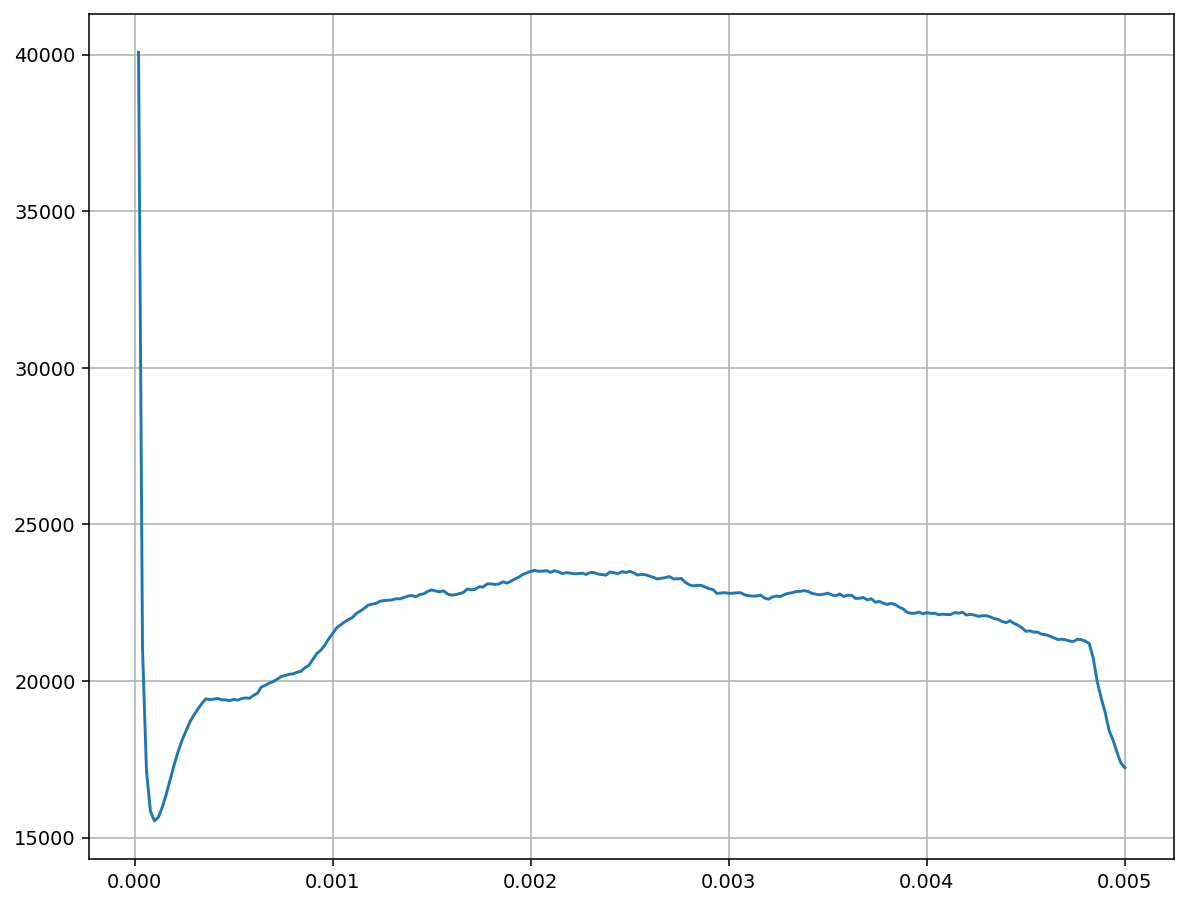

In [10]:
def find_power(data:np.ndarray):
    def calculate_row_power(a):
        th = 0.00001
        row_power = 0
        for i in range(a.size - 1):
            if (a[i+1] - a[i])**2 >= th: row_power += a[i+1]**2
        return row_power

    return np.sum(np.apply_along_axis(calculate_row_power, 0, data)) + \
           np.sum(np.apply_along_axis(calculate_row_power, 1, data))

powers = {}

for dz, phase in retrieved_phases.items():
    powers[dz] = find_power(phase)
    ic(dz, powers[dz])

figure(figsize=(10, 8), dpi=140)
plt.plot(powers.keys(), powers.values())
plt.grid()
plt.show()

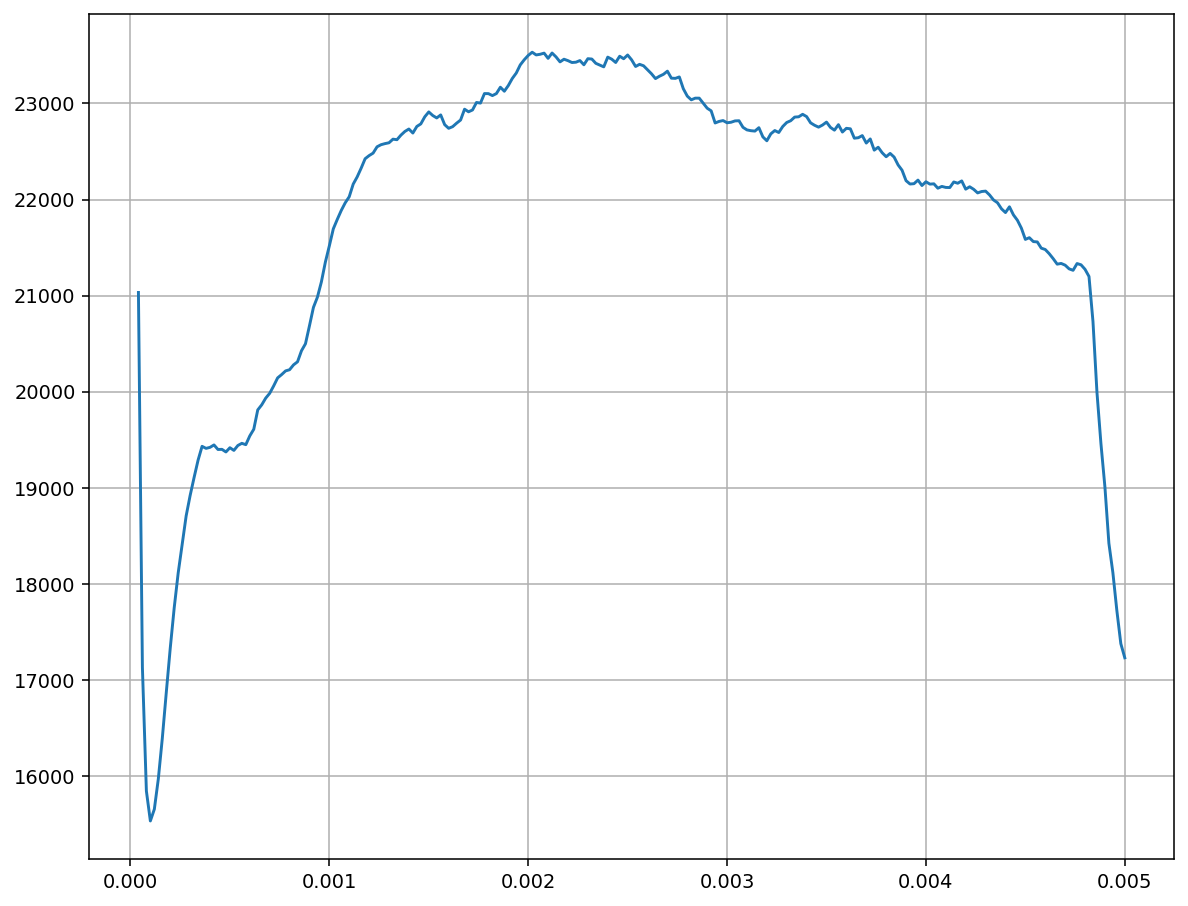

In [15]:
normal_powers = {k: v for k, v in powers.items() if k > 0.00002}

figure(figsize=(10, 8), dpi=140)
plt.plot(normal_powers.keys(), normal_powers.values())
plt.grid()
plt.show()

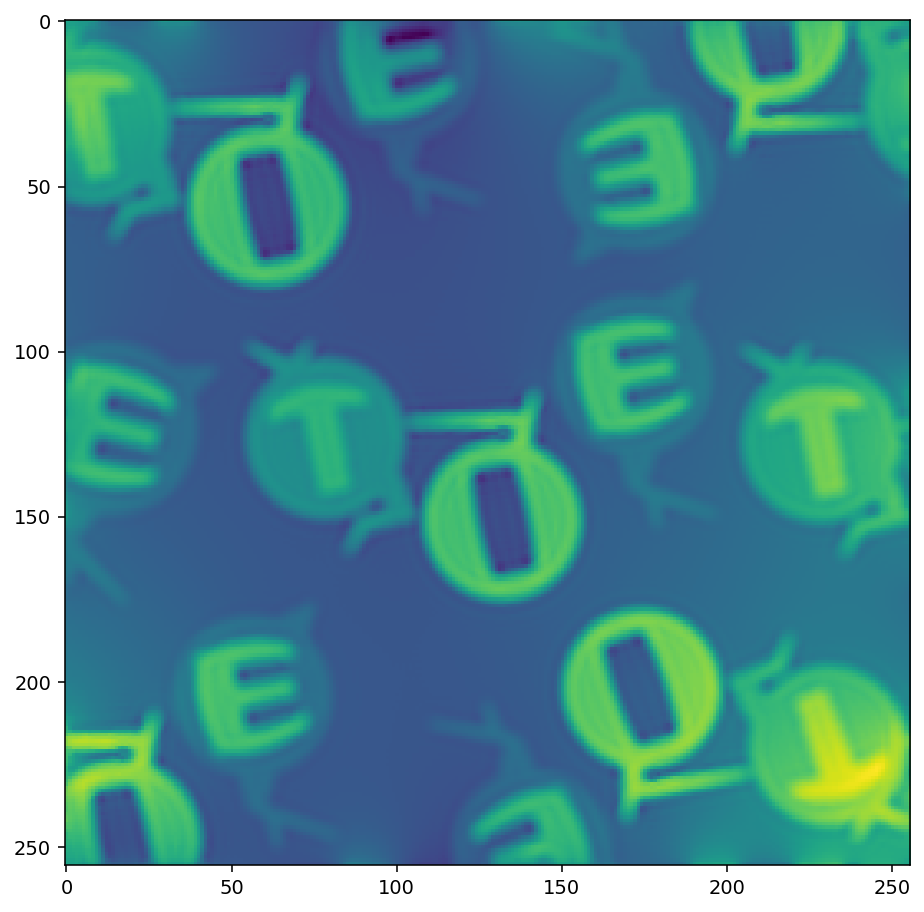

In [16]:
figure(figsize=(10, 8), dpi=140)
plt.imshow(retrieved_phases[max(normal_powers, key=normal_powers.get)])
plt.show()